# Métodos de Monte Carlo

Es el nombre que se le da a las técnicas que utilizan generación de métodos aleatorios para resolver problemas en la computadora.

# Números aleatorios

¿Qué es _random_ ?¿Existe?

Las personas batallan mucho para generar aleatoriedad por si mismas.

Las computadoras son máquinas deterministas.

Usaremos **números pseudo aleatorios**.


**Ejercicio** Programa el generador aleatorio de tipo [_linear congruential_](http://en.wikipedia.org/wiki/Linear_congruential_generator):
    
$$x_{n+1} = (a x_n + b) \mod c$$

Para que sea más fácil, utiliza el concepto de [`generators`](http://anandology.com/python-practice-book/iterators.html) de **Python**




<div class="alert alert-info">
 **Ejercicio** ¿Cuál es la secuencia?
</div>

<div class="alert alert-info">
**Ejercicio**  ¿De qué longitud es la secuencia? ¿Está relacionada con el valor de $c$? ¿Cómo?
</div>



In [2]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [3]:
def pseudo_random_number_generator(seed, a, b, c):
    yield 1

<div class="alert alert-info">
**Ejercicio** En los 70's fuéron muy populares los coeficientes [**RANDU**](http://en.wikipedia.org/wiki/RANDU), pero se demostró que fallaban miserablemente las pruebas de aleatoriedad, en particular los tripletes de números consecutivos caen en uno de 15 planos paralelos... Dibuja los primeros 100,000 tripletes y reproduce la imagen de la wikipedia.
</div>

Afortunadamente (por lo menos para los fines de este curso) `python` incluye un generador llamado [**Mersenne Twister**](http://en.wikipedia.org/wiki/Mersenne_twister), el cual podemos usar si importamos la biblioteca `random`

In [4]:
import random

# Integración de Monte Carlo

Una técnica de **Monte Carlo** es la integración, el algoritmo es muy simple:

_Recuerda que la integración devuelve el_ **área** _de una figura._

1. Rodea el objeto al cual le quieres calcular el área con una figura de la cual conozcas el área (un rectángulo si es de dos dimensiones) y
2. Genera un número muy grande de puntos al azar dentro de la figura de la cual conoces el área.
3. El área del objeto es aproximadamente la fracción de puntos que cayeron dentro del objeto multiplicada por el área del objeto que la rodea.

### Ejemplo: Calcular el volumen de una esfera de radio $r = 1$

Podemos usar la simetría del problema y concentrarnos en un cuadrante y luego multiplicar por $8$ el resultado. Usemos como figura que conocemos un cubo de lado $1$.


In [5]:
volumen_cubo = 1 * 1 * 1

N = 1000000
count = 0
for j in range(N):
    point = np.array([random.random(), random.random(), random.random()])  # Un punto al azar, random() genera valores entre 0-1
    if sum(point**2) < 1:  # x^2 + y^2 + z^2 < 1 ¿Esta dentro?
        count = count + 1
        
fraccion = float(count)/float(N)

volumen = fraccion * volumen_cubo

# Nos concentramos en solamente un cuadrante, entonces hacemos por ocho
# ya que en 3d tenemos 8 cuadrantes
volumen_esfera = volumen * 8    

In [9]:
# Del millón de puntos al azar en 3D que pedimos que hiciera, solamente
print(count)
# cumpieron con la propiedad de que x^2 + y^2 + z^2 < 1 

523455


In [17]:
# i.e. ese fue el porcentaje de los puntos que sí cumplieron.
str((fraccion * 100)) + str("%")

'52.3455%'

In [19]:
# Tenemos el volumen en solamente un cuadrante
print(volumen)

0.523455


El volumen de la esfera se puede calcular analiticamente y es igual a 

$$
V = \frac{4}{3} \pi r^3
$$

In [20]:
# Volumen en 3d
volumen_esfera

4.18764

In [21]:
# Podemos compararlo directamente con la fórmula en una esfera de r = 1
volumen = (4.0/3)*math.pi 
volumen

4.1887902047863905

In [ ]:
# Podemos notar que la diferencia es casi nula.

<div class="alert alert-info">
**Ejercicio** Calcula 

$$
I = \int_0^\pi \sin x dx
$$

Usando técnicas de Monte Carlo. Compara con el resultado analítico.
</div>

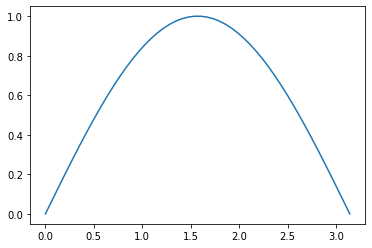

In [3]:
# Queremos integrar esto en 3d
X = np.linspace(0,math.pi)
Y = np.sin(X)
plot(X,Y)

In [4]:
area_rectangulo = math.pi

N = 1000000
count = 0
for j in range(N):
    point = np.array([random.random(), random.random()*math.pi])  # Un punto al azar, random() genera valores entre 0-1
    if point[0] < math.sin(point[1]):   
        count = count + 1
        
fraccion = float(count)/float(N)

area = fraccion * area_rectangulo

In [5]:
fraccion

0.63633

<div class="alert alert-info">
**Ejercicio** Encuentra el volumen de la intersección de una esfera y un cilindro. La esfera tiene $r = 1$ y está centrada en el origen. El cilindro tiene radio $r = 0.5$ y su eje es perpendicular al eje $x$ y pasa por el punto $(0.5, 0, 0)$.
</div>

In [6]:
area

1.999089653258793

In [48]:
area_rectangulo = math.pi
l = []
l2 = []

N = 10
count = 0
for j in range(N):
    point = np.array([random.random(), random.random()*math.pi])  # Un punto al azar, random() genera valores entre 0-1
    l.append(point)
    if point[0] < math.sin(point[1]):   # x^2 + y^2 + z^2 < 1 ¿Esta dentro?
        count = count + 1
        l2.append(point)
        
fraccion = float(count)/float(N)

area = fraccion * area_rectangulo

In [49]:
print(l)

[array([0.2463907 , 2.18767948]), array([0.98567164, 0.97080516]), array([0.75115031, 0.21359533]), array([0.0323732 , 2.20001051]), array([0.34704014, 1.8151533 ]), array([0.21422362, 1.38105689]), array([0.70171626, 0.05427224]), array([0.92060521, 0.06514031]), array([0.03584912, 2.04870023]), array([0.42105568, 0.26355258])]


In [50]:
print(l2)

[array([0.2463907 , 2.18767948]), array([0.0323732 , 2.20001051]), array([0.34704014, 1.8151533 ]), array([0.21422362, 1.38105689]), array([0.03584912, 2.04870023])]


In [51]:
area

1.5707963267948966